<a href="https://colab.research.google.com/github/ArunadeviRamesh/SVD-for-Image-Compression/blob/main/SVD_for_Image_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use SVD for image compression.  Demonstrate the quality of the images at different "k" values.

(400, 600, 3)


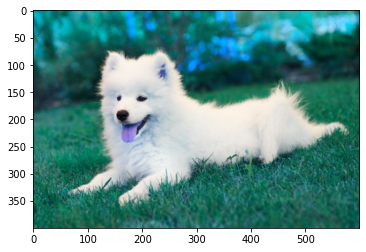

In [ ]:
import os
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread('/content/dog images.jpg')
originalshape = img.shape
print(originalshape)
plt.imshow(img)

In [ ]:
import imquality.brisque as brisque
brisque.score(img)

9.043327010358524

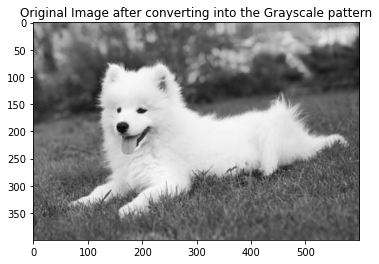

In [ ]:
path = '/content/dog images.jpg'
img = Image.open(path)
imggray = img.convert('LA')
imgmat = np.array( list(imggray.getdata(band = 0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure()
plt.imshow(imgmat, cmap = 'gray')
plt.title("Original Image after converting into the Grayscale pattern")
plt.show()

Using SVD Techniques - After compression: 
 Image = 1


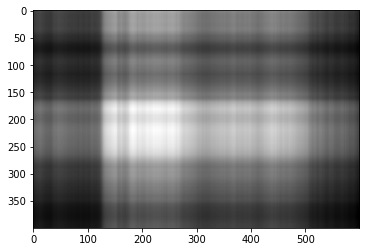

Image Quality 58.86122265622757
Compression Ratio 0.4170833333333333
 Image = 2


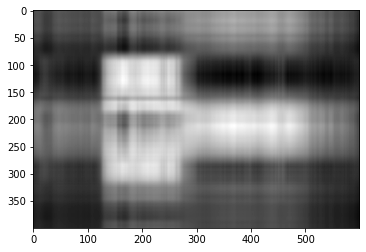

Image Quality 57.214712848739026
Compression Ratio 0.8341666666666666
 Image = 5


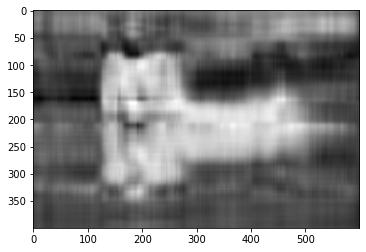

Image Quality 52.1044268065867
Compression Ratio 2.0854166666666667
 Image = 10


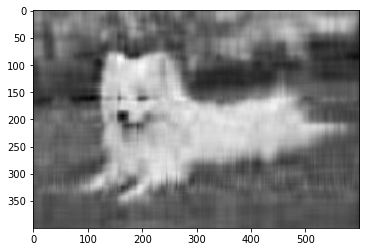

Image Quality 45.20524266172569
Compression Ratio 4.170833333333333
 Image = 20


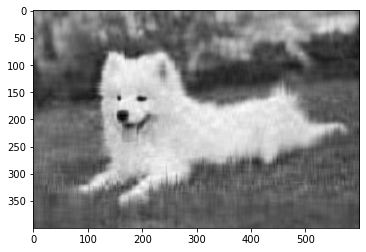

Image Quality 39.647300763442985
Compression Ratio 8.341666666666667
 Image = 30


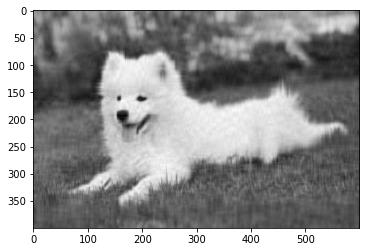

Image Quality 35.20095062293237
Compression Ratio 12.5125
 Image = 50


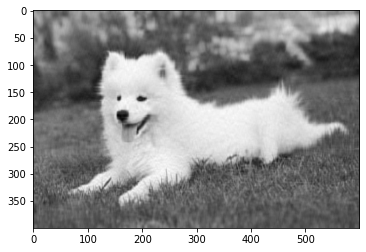

Image Quality 25.921215979025163
Compression Ratio 20.854166666666668
 Image = 300


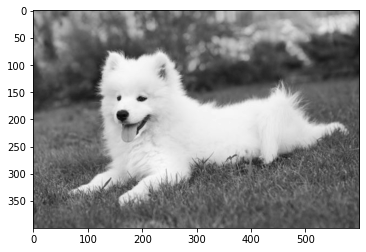

Image Quality 6.229502056206087
Compression Ratio 125.125


In [ ]:
q=[]
print("Using SVD Techniques - After compression: ")
U, S, Vt = np.linalg.svd(imgmat)
l=[1, 2, 5, 10, 20, 30, 50, 300]
for i in range(len(l)):
  k=l[i]
  cmpimg = np.matrix(U[:, :k]) * np.diag(S[:k]) * np.matrix(Vt[:k,:])
  print(" Image =",k )
  plt.imshow(cmpimg, cmap = 'gray')
  plt.show()
  compression_ratio =100.0* (k*(originalshape[0] + originalshape[1])+k)/(originalshape[0]*originalshape[1])
  result = Image.fromarray((cmpimg ).astype(np.uint8))
  result.save('compressed.jpg')
  img = cv2.imread('/content/compressed.jpg')
  import imquality.brisque as brisque
  a=brisque.score(img)
  print("Image Quality",brisque.score(img))
  print("Compression Ratio",compression_ratio) 
  q.append(compression_ratio)


ideal K without loss of image quality 
k= 50-100 is the best k value without loss of image quality